Cài đặt thư viện hỗ trợ

In [13]:
import pandas as pd

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Patch

Đọc dữ liệu toàn quốc

In [14]:
raw_data = pd.read_csv('TongHop.csv')
raw_data.head()

,SBD,TOÁN,VĂN,LÝ,HÓA,SINH,SỬ,ĐỊA,GDCD,ANH,KHTN,KHXH,KHỐI A,KHỐI B,KHỐI C,KHỐI D,KHỐI A1
0,1063438,3.0,3.5,2.75,3.25,2.75,2.50,5.50,5.50,2.6,2.92,4.50,9.0,9.00,11.50,9.1,8.35
1,1063463,4.0,3.0,2.75,3.75,4.50,1.50,5.00,5.75,3.0,3.67,4.08,10.5,12.25,9.50,10,9.75
2,1063464,5.0,3.0,3.75,2.25,3.50,3.50,5.75,5.75,3.0,3.17,5.00,11.0,10.75,12.25,11,11.75
3,1063470,2.6,4.5,2.00,3.50,3.25,1.75,4.25,6.25,3.0,2.92,4.08,8.1,9.35,10.50,10.1,7.60
4,1063477,3.2,5.0,2.00,3.00,3.00,2.50,4.00,7.00,3.4,2.67,4.50,8.2,9.20,11.50,11.6,8.60


In [15]:
number_of_rows = len(raw_data.index)
number_of_rows

844122

In [16]:
len(raw_data.columns)

17

Nhận xét: dữ liệu phân tích bao gồm: 17 cột, 844122 dòng - tương ứng dữ liệu cho các trường SBD, điểm các môn thi, điểm các khối. 


In [30]:
provinces = pd.Series(['Hà Nội','TP.HCM','TP. Hải Phòng','Hà Giang','Cao Bằng','Lai Châu','Điện Biên','Lào Cai','Tuyên Quang','Lạng Sơn','Bắc Kạn','Thái Nguyên','Yên Bái','Sơn La','Phú Thọ','Vĩnh Phúc','Quảng Ninh','Bắc Giang','Bắc Ninh','Hải Dương','Hưng Yên','Hòa Bình','Hà Nam','Nam Định','Thái Bình','Ninh Bình','Thanh Hóa','Nghệ An','Hà Tĩnh','Quảng Bình','Quảng Trị','Thừa Thiên Huế','TP. Đà Nẵng','Quảng Nam','Quảng Ngãi','Bình Định','Phú Yên','Gia Lai','Kon Tum','Đắk Lắk','Đắk Nông','Khánh Hòa','Ninh Thuận','Bình Thuận','Lâm Đồng','Bình Phước','Bình Dương','Tây Ninh','Đồng Nai','Long An','Đồng Tháp','An Giang','Bà Rịa – Vũng Tàu','Tiền Giang','TP.Cần Thơ','Hậu Giang','Bến Tre','Vĩnh Long','Trà Vinh','Sóc Trăng','Bạc Liêu','Kiên Giang','Cà Mau'])

In [31]:
def provinceMeans(provinces,combination):
    meanList = []
    k = 1

    for pro in provinces:
         csvName = 'csv/' + str(k) + '.csv'
         data = pd.read_csv(csvName)
         m = data[combination].mean()
         meanList.append(m)
         k += 1
   
    
    meanSeries = pd.Series(meanList)
    return meanSeries

In [32]:
def createMeanRankDF(combination):
    #add provinces means
    means = provinceMeans(provinces,combination)
    data = {'TÊN': provinces, 'ĐTB': means }
    df = pd.DataFrame(data)

    #sort dataframe by mean
    df = df.sort_values(['ĐTB'],ascending=False)

    #create 'Rank' column 
    df = df.reset_index(drop=True)
    df['Rank'] = df.index + 1

    #add whole country data
    country = {'TÊN': 'Toàn quốc', 'ĐTB': raw_data[combination].mean(),'Rank': 0}
    df = df.append(country,ignore_index=True)

    return df

In [33]:
def createDF(combination):
    means = provinceMeans(provinces,combination).tolist()
    data = {'ĐTB': means }
    df = pd.DataFrame(data, index=provinces.tolist())
    df = df.sort_values(['ĐTB'],ascending=False)
    return df

In [41]:
def makeColorList(df):
    colorList = []

    for pro in df.index:
        if pro == 'Hà Giang':
            colorList.append('#FFA600')
        else:
            colorList.append('#003F5C')
    
    return colorList

In [42]:
def visualization(combination):
    df_ = createDF(combination)
    colours = {"HG": "#FFA600", "Else": "#003F5C"}
    colors = makeColorList(df_)
    df_.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Tỉnh thành') 
    plt.ylabel('Điểm')
    plt.title('Điểm trung bình '+ combination + ' cả nước năm 2018')
    df_['ĐTB'].plot(kind="bar", color=colors).legend([Patch(facecolor=colours['HG']),Patch(facecolor=colours['Else'])], ["ĐTB Hà Giang", "ĐTB các tỉnh khác"])

    plt.show()

In [43]:
def conclusion(df,combination):
    # find HG
    is_hg = df.TÊN == 'Hà Giang'
    df[is_hg] 
    # compare with the country
    is_country = df.TÊN == 'Toàn quốc'
    df = df[is_hg | is_country]
    # conclusion
    print(df) 
    print('----------')
    print('Xét điểm trung bình môn', combination, ': Hà Giang đạt', round(df.iat[0,1],4))
    print('Xếp hạng',df.iat[0,2],'/ 63 toàn quốc.')
    print('Độ chênh lệch điểm của', df.iat[0,0], 'so với',df.iat[1,0],':', round(abs(df.iat[0,1]-df.iat[1,1]),4))

## So sánh điểm trung bình theo từng khối

### Khối A:

In [71]:
combination = 'KHỐI A'
df = createMeanRankDF(combination)
print(df)

          TÊN        ĐTB  Rank
0      Hà Nam  17.475095     1
1    Nam Định  17.242284     2
2   Ninh Bình  17.207086     3
3    Bắc Ninh  17.124095     4
4   Vĩnh Phúc  17.049509     5
..        ...        ...   ...
59    Bắc Kạn  13.335072    60
60   Hà Giang  13.086833    61
61   Hòa Bình  12.680836    62
62   An Giang   5.277858    63
63  Toàn quốc  15.291309     0

[64 rows x 3 columns]


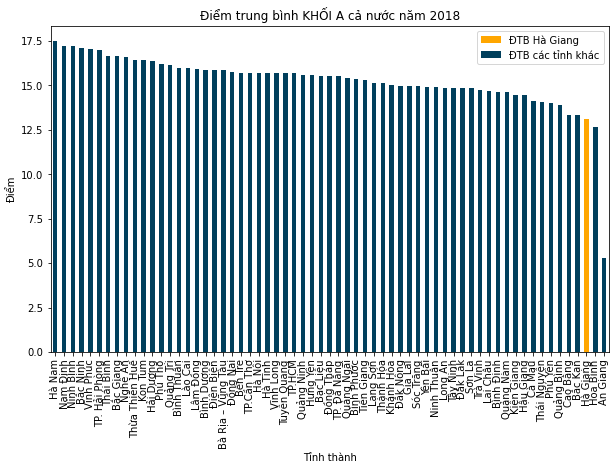

In [45]:
visualization(combination)

In [185]:
conclusion(df,combination)

          TÊN        ĐTB  Rank
60   Hà Giang  13.086833    61
63  Toàn quốc  15.291309     0
----------
Xét điểm trung bình môn KHỐI A : Hà Giang đạt 13.0868
Xếp hạng 61 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 2.2045


### Khối B:

In [46]:
combination = 'KHỐI B'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN        ĐTB  Rank
60   Hà Giang  12.880526    61
63  Toàn quốc  14.886981     0
----------
Xét điểm trung bình môn KHỐI B : Hà Giang đạt 12.8805
Xếp hạng 61 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 2.0065


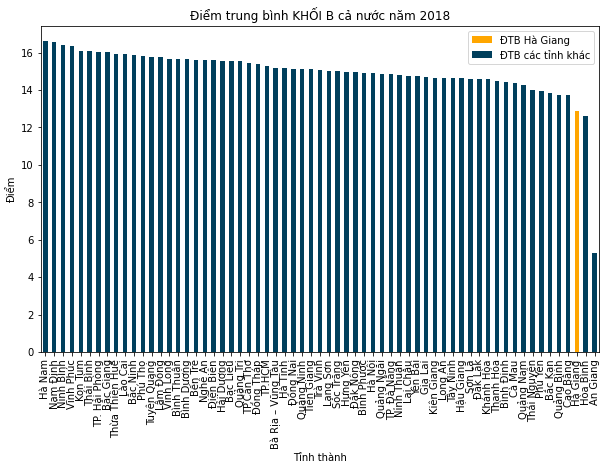

In [47]:
visualization(combination)

### Khối C:


In [48]:
combination = 'KHỐI C'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN        ĐTB  Rank
61   Hà Giang  12.491499    62
63  Toàn quốc  14.410536     0
----------
Xét điểm trung bình môn KHỐI C : Hà Giang đạt 12.4915
Xếp hạng 62 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 1.919


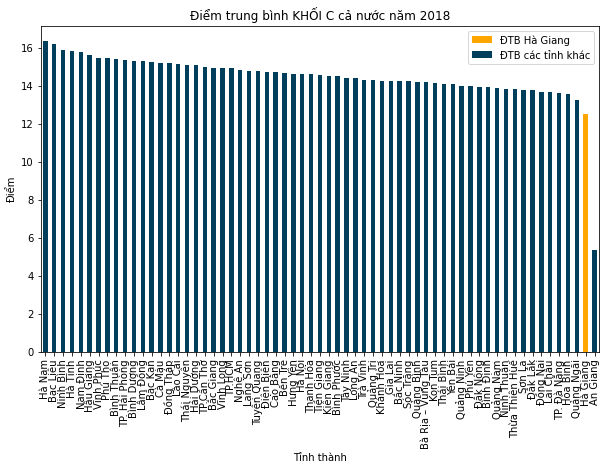

In [49]:
visualization(combination)

### Khối A1:


In [50]:
combination = 'KHỐI A1'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN        ĐTB  Rank
60   Hà Giang  12.396864    61
63  Toàn quốc  14.809920     0
----------
Xét điểm trung bình môn KHỐI A1 : Hà Giang đạt 12.3969
Xếp hạng 61 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 2.4131


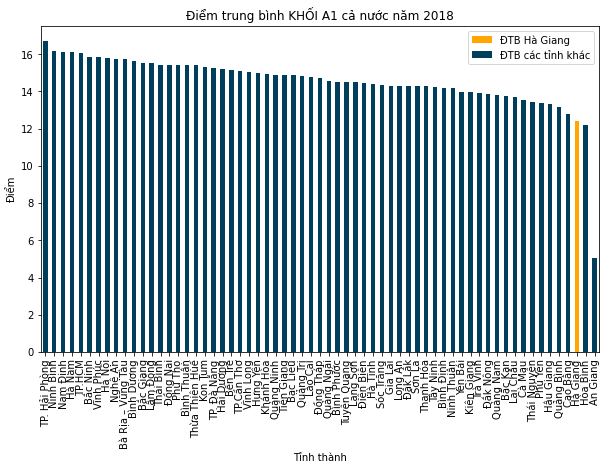

In [51]:
visualization(combination)

## So sánh điểm trung bình theo từng môn

### Toán

In [52]:
combination = 'TOÁN'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
62   Hà Giang  3.494335    63
63  Toàn quốc  4.872639     0
----------
Xét điểm trung bình môn TOÁN : Hà Giang đạt 3.4943
Xếp hạng 63 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 1.3783


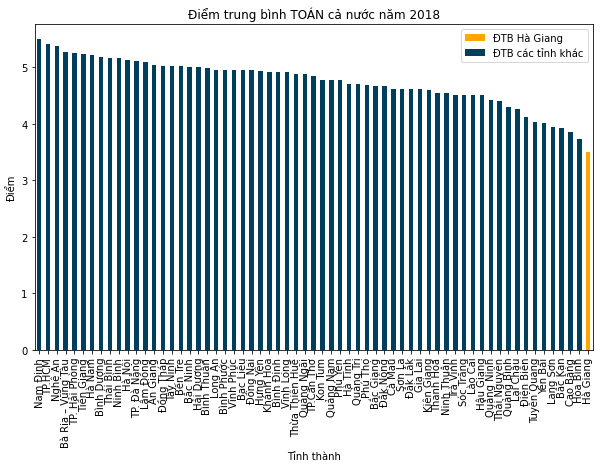

In [53]:
visualization(combination)

### Văn

In [54]:
combination = 'VĂN'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
62   Hà Giang  4.388424    63
63  Toàn quốc  5.435631     0
----------
Xét điểm trung bình môn VĂN : Hà Giang đạt 4.3884
Xếp hạng 63 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 1.0472


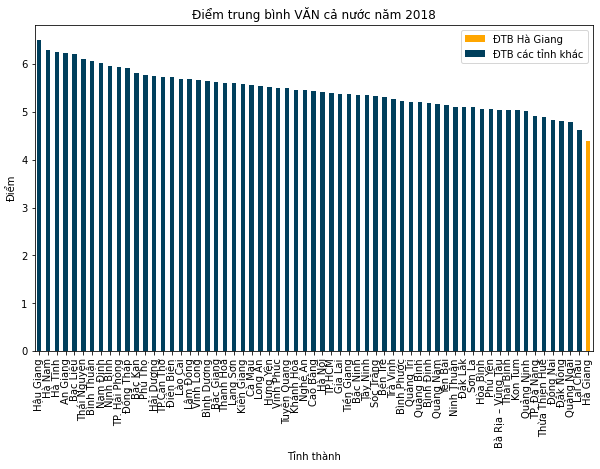

In [55]:
visualization(combination)

### Lý

In [56]:
combination = 'LÝ'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
59   Hà Giang  4.228956    60
63  Toàn quốc  4.953409     0
----------
Xét điểm trung bình môn LÝ : Hà Giang đạt 4.229
Xếp hạng 60 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.7245


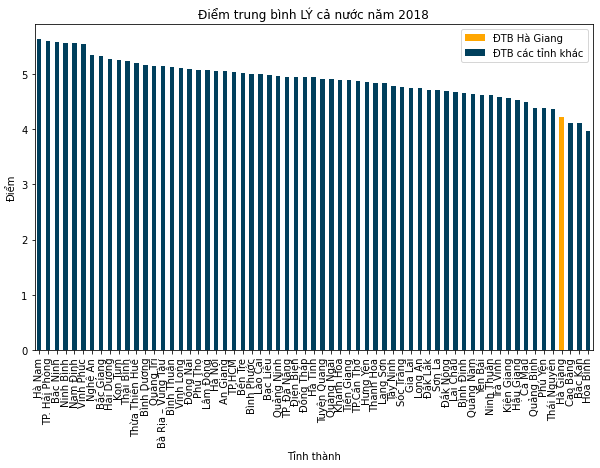

In [57]:
visualization(combination)

### Hóa

In [58]:
combination = 'HÓA'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
61   Hà Giang  4.141709    62
63  Toàn quốc  4.855909     0
----------
Xét điểm trung bình môn HÓA : Hà Giang đạt 4.1417
Xếp hạng 62 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.7142


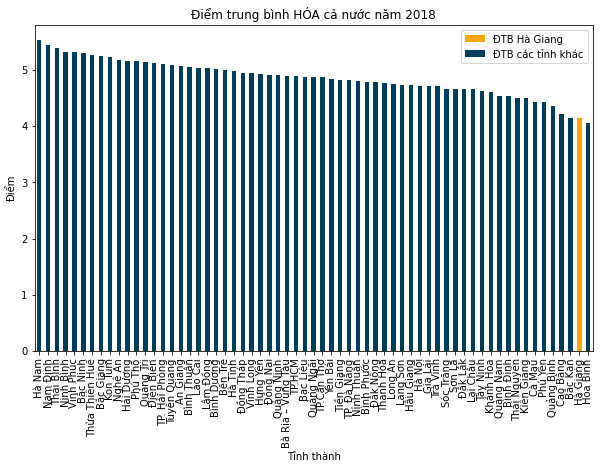

In [59]:
visualization(combination)

### Sinh

In [60]:
combination = 'SINH'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
61   Hà Giang  4.033772    62
63  Toàn quốc  4.547807     0
----------
Xét điểm trung bình môn SINH : Hà Giang đạt 4.0338
Xếp hạng 62 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.514


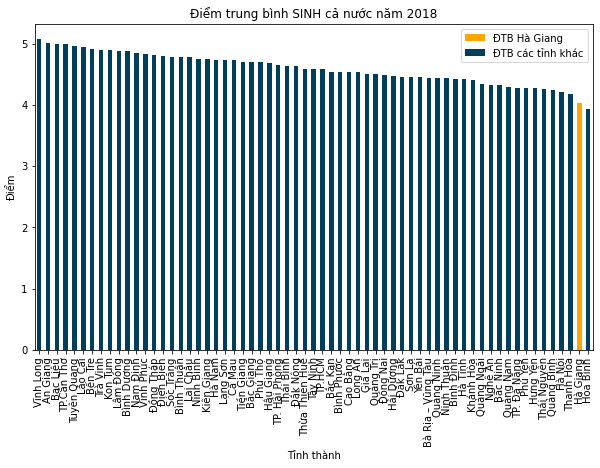

In [61]:
visualization(combination)

### Sử

In [62]:
combination = 'SỬ'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
62   Hà Giang  3.445684    63
63  Toàn quốc  3.796682     0
----------
Xét điểm trung bình môn SỬ : Hà Giang đạt 3.4457
Xếp hạng 63 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.351


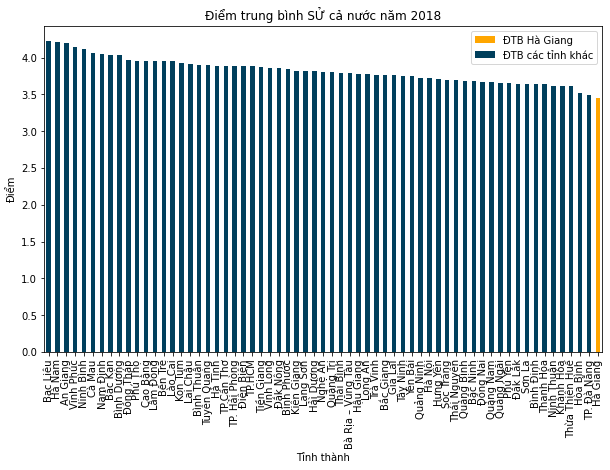

In [63]:
visualization(combination)

### Địa

In [64]:
combination = 'ĐỊA'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
62   Hà Giang  4.734719    63
63  Toàn quốc  5.474119     0
----------
Xét điểm trung bình môn ĐỊA : Hà Giang đạt 4.7347
Xếp hạng 63 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.7394


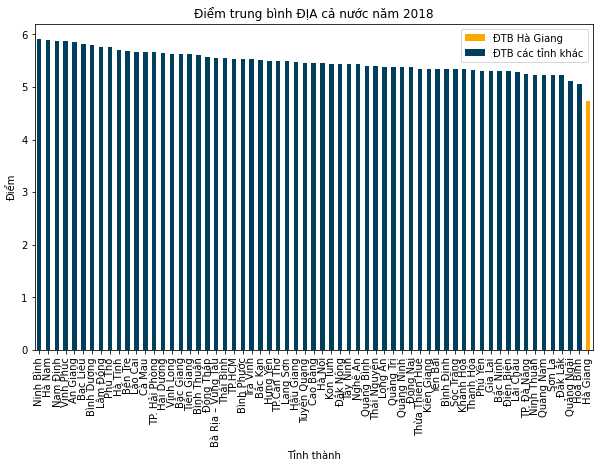

In [65]:
visualization(combination)

### GDCD

In [66]:
combination = 'GDCD'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
62   Hà Giang  6.151831    63
63  Toàn quốc  7.141419     0
----------
Xét điểm trung bình môn GDCD : Hà Giang đạt 6.1518
Xếp hạng 63 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.9896


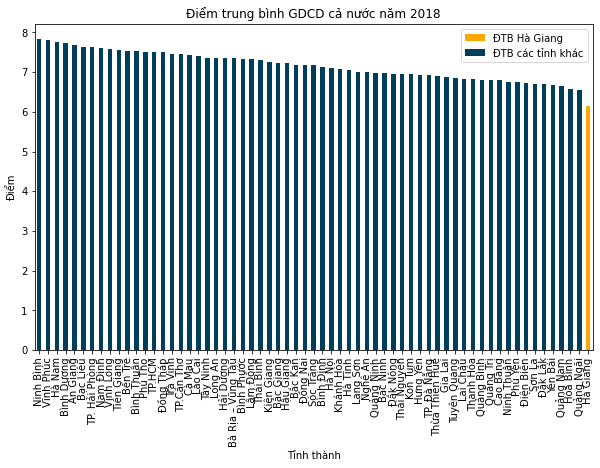

In [67]:
visualization(combination)

### Anh

In [68]:
combination = 'ANH'
df = createMeanRankDF(combination)
conclusion(df,combination)

          TÊN       ĐTB  Rank
62   Hà Giang  2.967740    63
63  Toàn quốc  3.926497     0
----------
Xét điểm trung bình môn ANH : Hà Giang đạt 2.9677
Xếp hạng 63 / 63 toàn quốc.
Độ chênh lệch điểm của Hà Giang so với Toàn quốc : 0.9588


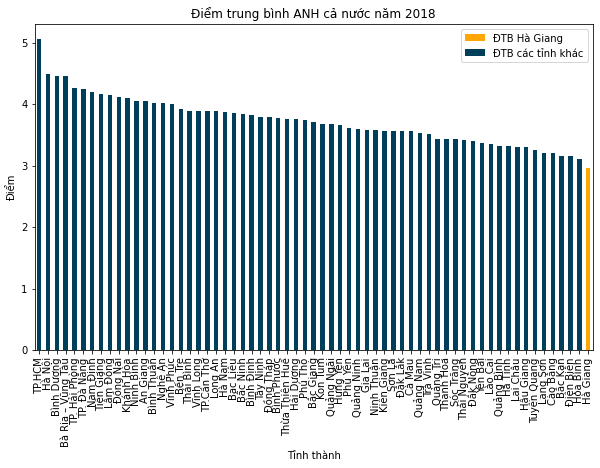

In [69]:
visualization(combination)

## Một số nhận xét rút ra:

- Điểm trung bình các môn thi ở Hà Giang đều rơi vào khoảng mức thấp nhất cả nước, nhiều môn còn đứng chót cả nước (Toán, Văn, Sử, Địa, GDCD, Anh). 

- Hà Giang không có môn/khối thi nào có điểm trung bình cao hơn trung bình của cả nước.

- Điểm thi các môn luôn thấp hơn điểm trung bình cả nước từ 1-2.5 điểm.

- Kết luận tương tự được đưa ra với điểm trung bình theo từng khối thi.

- Môn có điểm trung bình so với toàn quốc tốt nhất là môn Lý với điểm trung bình là 4.228956, nhưng vẫn ở thứ hạng khá kém là 60/63.

=> Xét mặt bằng chung, học sinh tỉnh Hà Giang không thuộc diện khá, giỏi với số điểm rất kém. Có thể thấy đây đúng là 'vùng trũng giáo dục' của Việt Nam.

- Xét về độ chênh lệch:
    - môn Sử có độ chênh lệch ít nhất: 0.351 => Tuy HG đứng chót nhưng vẫn ít bất thường do biên độ lệch giữa các tỉnh là không nhiều.
    
    - môn Toán có độ chênh lệch nhiều nhất: 1.3783 => Độ lệch điểm của môn Toán gấp 4 lần so với môn Sử. HG đứng chót cả nước về môn này, nhưng độ chênh lệch với các tỉnh khác là tương đối nhiều hơn. Cần xem xét số thí sinh đạt điểm cao thì mới có thể đưa ra thêm kết luận.